In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from lusi.svm import SVMIRandomProjections
from lusi.invariants import *

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [2]:
diabetes_df = pd.read_csv('data/diabetes.csv')
diabetes_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
# Get the data and split it in train and test
X, y = diabetes_df.drop('Outcome', axis=1).values, diabetes_df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=47)

In [4]:
# Scale the data
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [83]:
# Run experiments
accuracies = []

for num_invariants in range(1, 9):
    print(f'Running with {num_invariants} invariants...')
    invariant_accuracies = []

    for _ in range(1000):
        svm_rp = SVMIRandomProjections(C=1, kernel='rbf', gamma='auto', delta=0.001)
        svm_rp.fit(X_train_scaled, y_train, num_invariants=num_invariants, tolerance=10)
        y_pred = svm_rp.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        invariant_accuracies.append(acc)
    
    accuracies.append(invariant_accuracies)


Running with 1 invariants...
Running with 2 invariants...
Running with 3 invariants...
Running with 4 invariants...
Running with 5 invariants...
Running with 6 invariants...
Running with 7 invariants...
Running with 8 invariants...


[]

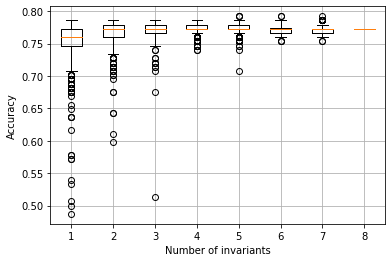

In [117]:
plt.boxplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

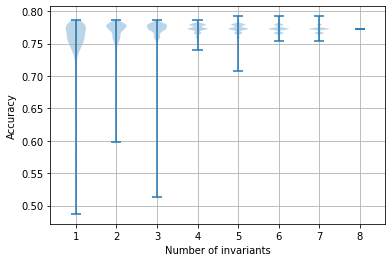

In [118]:
plt.violinplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

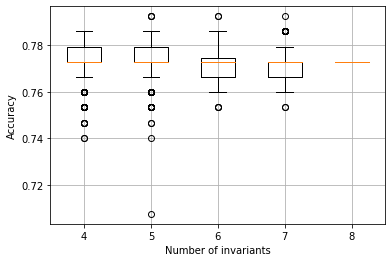

In [119]:
plt.boxplot(accuracies[3:], positions=range(4, 9))
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

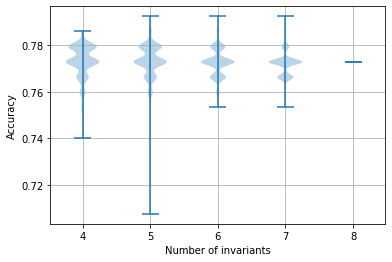

In [120]:
plt.violinplot(accuracies[3:], positions=range(4, 9))
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

In [150]:
svm_baseline = SVMIRandomProjections(C=1, kernel='rbf', gamma='auto', delta=0.001)
svm_baseline.fit(X_train_scaled, y_train, num_invariants=0, tolerance=10)
y_pred = svm_baseline.predict(X_test_scaled)
acc_baseline = accuracy_score(y_test, y_pred)

print(f'Baseline accuracy: {acc_baseline}')


for inv, acc in enumerate(accuracies):
    acc_arr = np.array(acc)
    n_high_acc = len(np.where(acc_arr >= acc_baseline)[0])
    max_acc = np.max(acc_arr)
    print(f'\nNumber of elements with accuracy >= {acc_baseline} using {inv + 1} invariants: {n_high_acc}')
    print(f'Max. accuracy: {max_acc}')

Baseline accuracy: 0.7792207792207793

Number of elements with accuracy >= 0.7792207792207793 using 1 invariants: 224
Max. accuracy: 0.7857142857142857

Number of elements with accuracy >= 0.7792207792207793 using 2 invariants: 377
Max. accuracy: 0.7857142857142857

Number of elements with accuracy >= 0.7792207792207793 using 3 invariants: 402
Max. accuracy: 0.7857142857142857

Number of elements with accuracy >= 0.7792207792207793 using 4 invariants: 361
Max. accuracy: 0.7857142857142857

Number of elements with accuracy >= 0.7792207792207793 using 5 invariants: 336
Max. accuracy: 0.7922077922077922

Number of elements with accuracy >= 0.7792207792207793 using 6 invariants: 250
Max. accuracy: 0.7922077922077922

Number of elements with accuracy >= 0.7792207792207793 using 7 invariants: 155
Max. accuracy: 0.7922077922077922

Number of elements with accuracy >= 0.7792207792207793 using 8 invariants: 0
Max. accuracy: 0.7727272727272727
